In [805]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("botswana_bank_customer_churn.csv")

# Thông tin cơ bản về dữ liệu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [806]:
df.isnull().sum()

RowNumber                               0
CustomerId                              0
Surname                                 0
First Name                              0
Date of Birth                           0
Gender                                  0
Marital Status                          0
Number of Dependents                    0
Occupation                              0
Income                                  0
Education Level                         0
Address                                 0
Contact Information                     0
Customer Tenure                         0
Customer Segment                        0
Preferred Communication Channel         0
Credit Score                            0
Credit History Length                   0
Outstanding Loans                       0
Churn Flag                              0
Churn Reason                       101546
Churn Date                         101546
Balance                                 0
NumOfProducts                     

In [807]:
print(df.describe())

           RowNumber  Number of Dependents         Income  Customer Tenure  \
count  115640.000000         115640.000000  115640.000000    115640.000000   
mean    57820.500000              2.502923   52641.363046        15.490591   
std     33382.536902              1.707249   27429.756390         8.654217   
min         1.000000              0.000000    5000.960000         1.000000   
25%     28910.750000              1.000000   28857.070000         8.000000   
50%     57820.500000              3.000000   52658.110000        15.000000   
75%     86730.250000              4.000000   76364.157500        23.000000   
max    115640.000000              5.000000   99999.510000        30.000000   

        Credit Score  Credit History Length  Outstanding Loans     Churn Flag  \
count  115640.000000          115640.000000      115640.000000  115640.000000   
mean      574.299775              15.546602       25502.731792       0.121878   
std       159.067499               8.654630       1412

In [808]:
print(df.head())

   RowNumber                            CustomerId   Surname First Name  \
0          1  83ef0b54-35f6-4f84-af58-5653ac0c0dc4     Smith       Troy   
1          2  009f115a-e5ca-4cf4-97d6-530140545e4e  Sullivan    Katrina   
2          3  66309fd3-5009-44d3-a3f7-1657c869d573    Fuller      Henry   
3          4  b02a30df-1a5f-4087-8075-2a35432da641     Young    Antonio   
4          5  0d932e5b-bb3a-4104-8c83-f84270f7f2ea  Andersen       John   

  Date of Birth  Gender Marital Status  Number of Dependents  \
0     8/29/1987    Male       Divorced                     3   
1      2/7/2000  Female        Married                     1   
2      2/3/1954  Female         Single                     1   
3     1/15/1991  Female       Divorced                     5   
4      4/8/1992  Female       Divorced                     2   

                        Occupation    Income  ...  \
0      Information systems manager  77710.14  ...   
1               Charity fundraiser  58209.87  ...   
2  Te

In [809]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,115640.0,57820.500000,33382.536902,1.00,28910.750,57820.500,86730.2500,115640.00
Number of Dependents,115640.0,2.502923,1.707249,0.00,1.000,3.000,4.0000,5.00
Income,115640.0,52641.363046,27429.756390,5000.96,28857.070,52658.110,76364.1575,99999.51
Customer Tenure,115640.0,15.490591,8.654217,1.00,8.000,15.000,23.0000,30.00
Credit Score,115640.0,574.299775,159.067499,300.00,436.000,574.000,712.0000,850.00
Credit History Length,115640.0,15.546602,8.654630,1.00,8.000,16.000,23.0000,30.00
Outstanding Loans,115640.0,25502.731792,14127.859827,1000.43,13226.060,25505.285,37742.2500,49999.69
Churn Flag,115640.0,0.121878,0.327147,0.00,0.000,0.000,0.0000,1.00
Balance,115640.0,124639.209748,72210.476638,1.06,61991.915,124505.890,187122.9225,249998.91
NumOfProducts,115640.0,2.999274,1.411361,1.00,2.000,3.000,4.0000,5.00


In [810]:
#Lọc cột không cần thiết
#Các cột không cần thiết bao gồm RowNumber, CustomerId, Surname, First Name, Date of Birth, Address, Contact Information, Churn Reason, và Churn Date

columns_to_drop = [
    'RowNumber', 'CustomerId', 'Surname', 'First Name', 
    'Occupation', 'Address', 'Contact Information', 
    'Churn Reason', 'Churn Date'
]

# Lọc cột không cần thiết nếu chúng tồn tại trong DataFrame
filtered_data = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Kiểm tra kết quả sau khi lọc
print(filtered_data.head())  # In ra 5 dòng đầu của dữ liệu đã được lọc
print(filtered_data.columns)  # In ra danh sách các cột còn lại trong dữ liệu



  Date of Birth  Gender Marital Status  Number of Dependents    Income  \
0     8/29/1987    Male       Divorced                     3  77710.14   
1      2/7/2000  Female        Married                     1  58209.87   
2      2/3/1954  Female         Single                     1   9794.01   
3     1/15/1991  Female       Divorced                     5  15088.98   
4      4/8/1992  Female       Divorced                     2  60726.56   

  Education Level  Customer Tenure Customer Segment  \
0     High School               30           Retail   
1     High School               27              SME   
2     High School               14           Retail   
3     High School               23        Corporate   
4        Master's               22        Corporate   

  Preferred Communication Channel  Credit Score  Credit History Length  \
0                           Phone           397                     24   
1                           Email           665                     10   
2 

Gender: Giới tính của khách hàng.
Marital Status: Tình trạng hôn nhân của khách hàng.
Number of Dependents: Số người phụ thuộc của khách hàng.
Occupation: Nghề nghiệp của khách hàng.
Income: Thu nhập hàng năm của khách hàng.
Education Level: Trình độ học vấn của khách hàng.
Customer Tenure: Số năm khách hàng đã sử dụng dịch vụ của ngân hàng.
Customer Segment: Phân khúc khách hàng.
Preferred Communication Channel: Kênh giao tiếp ưa thích của khách hàng.
Credit Score: Điểm tín dụng của khách hàng.
Credit History Length: Thời gian có lịch sử tín dụng của khách hàng.
Outstanding Loans: Tổng số tiền vay chưa trả của khách hàng.
Balance: Số dư tài khoản của khách hàng.
NumOfProducts: Số sản phẩm/dịch vụ ngân hàng mà khách hàng đang sử dụng.
NumComplaints: Số lượng khiếu nại của khách hàng.

In [811]:
# Xử lý ngày sinh và tính tuổi
from datetime import datetime
import pandas as pd

# Chuyển đổi cột 'Date of Birth' thành datetime, nếu có lỗi thì sẽ gán NaT
filtered_data['Date of Birth'] = pd.to_datetime(filtered_data['Date of Birth'], errors='coerce')

# Tính tuổi dựa trên ngày sinh và thay thế cột 'Date of Birth' bằng cột 'age'
filtered_data['age'] = (pd.to_datetime('today') - filtered_data['Date of Birth']).dt.days // 365

# loại bỏ cột 'Date of Birth' và chỉ giữ lại tuổi
filtered_data = filtered_data.drop(columns=['Date of Birth'])


In [812]:
# Xử lý các cột phân loại (object)
for col in filtered_data.columns:
    if filtered_data[col].dtype == 'object':
        print(f"Value counts for {col}:")
        print(filtered_data[col].value_counts().sort_values(ascending=False))
        print()


Value counts for Gender:
Gender
Female    57830
Male      57810
Name: count, dtype: int64

Value counts for Marital Status:
Marital Status
Single      38684
Divorced    38539
Married     38417
Name: count, dtype: int64

Value counts for Education Level:
Education Level
Master's       28970
Diploma        28950
High School    28868
Bachelor's     28852
Name: count, dtype: int64

Value counts for Customer Segment:
Customer Segment
SME          38903
Corporate    38606
Retail       38131
Name: count, dtype: int64

Value counts for Preferred Communication Channel:
Preferred Communication Channel
Email    58044
Phone    57596
Name: count, dtype: int64



In [813]:
# Mã hóa nhị phân các cột phân loại với 2 giá trị
filtered_data['Gender'] = filtered_data['Gender'].map({'Female': 1, 'Male': 0})
filtered_data['Preferred Communication Channel'] = filtered_data['Preferred Communication Channel'].map({'Email': 1, 'Phone': 0})

# Mã hóa các cột phân loại với nhiều giá trị và thay thế các cột cũ
filtered_data = pd.get_dummies(filtered_data, columns=['Marital Status', 'Education Level', 'Customer Segment'], drop_first=True)

# Kiểm tra kết quả sau khi mã hóa
print(filtered_data.head())


   Gender  Number of Dependents    Income  Customer Tenure  \
0       0                     3  77710.14               30   
1       1                     1  58209.87               27   
2       1                     1   9794.01               14   
3       1                     5  15088.98               23   
4       1                     2  60726.56               22   

   Preferred Communication Channel  Credit Score  Credit History Length  \
0                                0           397                     24   
1                                1           665                     10   
2                                1           715                     21   
3                                0           747                     17   
4                                1           549                     25   

   Outstanding Loans  Churn Flag    Balance  NumOfProducts  NumComplaints  \
0           41959.74           0  211359.05              1              0   
1            8916.67  

In [814]:
print(filtered_data.columns)


Index(['Gender', 'Number of Dependents', 'Income', 'Customer Tenure',
       'Preferred Communication Channel', 'Credit Score',
       'Credit History Length', 'Outstanding Loans', 'Churn Flag', 'Balance',
       'NumOfProducts', 'NumComplaints', 'age', 'Marital Status_Married',
       'Marital Status_Single', 'Education Level_Diploma',
       'Education Level_High School', 'Education Level_Master's',
       'Customer Segment_Retail', 'Customer Segment_SME'],
      dtype='object')


In [815]:
filtered_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,115640.0,0.500086,0.500002,0.00,0.000,1.000,1.0000,1.00
Number of Dependents,115640.0,2.502923,1.707249,0.00,1.000,3.000,4.0000,5.00
Income,115640.0,52641.363046,27429.756390,5000.96,28857.070,52658.110,76364.1575,99999.51
Customer Tenure,115640.0,15.490591,8.654217,1.00,8.000,15.000,23.0000,30.00
Preferred Communication Channel,115640.0,0.501937,0.499998,0.00,0.000,1.000,1.0000,1.00
Credit Score,115640.0,574.299775,159.067499,300.00,436.000,574.000,712.0000,850.00
Credit History Length,115640.0,15.546602,8.654630,1.00,8.000,16.000,23.0000,30.00
Outstanding Loans,115640.0,25502.731792,14127.859827,1000.43,13226.060,25505.285,37742.2500,49999.69
Churn Flag,115640.0,0.121878,0.327147,0.00,0.000,0.000,0.0000,1.00
Balance,115640.0,124639.209748,72210.476638,1.06,61991.915,124505.890,187122.9225,249998.91


In [816]:
print(filtered_data.dtypes)

Gender                               int64
Number of Dependents                 int64
Income                             float64
Customer Tenure                      int64
Preferred Communication Channel      int64
Credit Score                         int64
Credit History Length                int64
Outstanding Loans                  float64
Churn Flag                           int64
Balance                            float64
NumOfProducts                        int64
NumComplaints                        int64
age                                  int64
Marital Status_Married                bool
Marital Status_Single                 bool
Education Level_Diploma               bool
Education Level_High School           bool
Education Level_Master's              bool
Customer Segment_Retail               bool
Customer Segment_SME                  bool
dtype: object


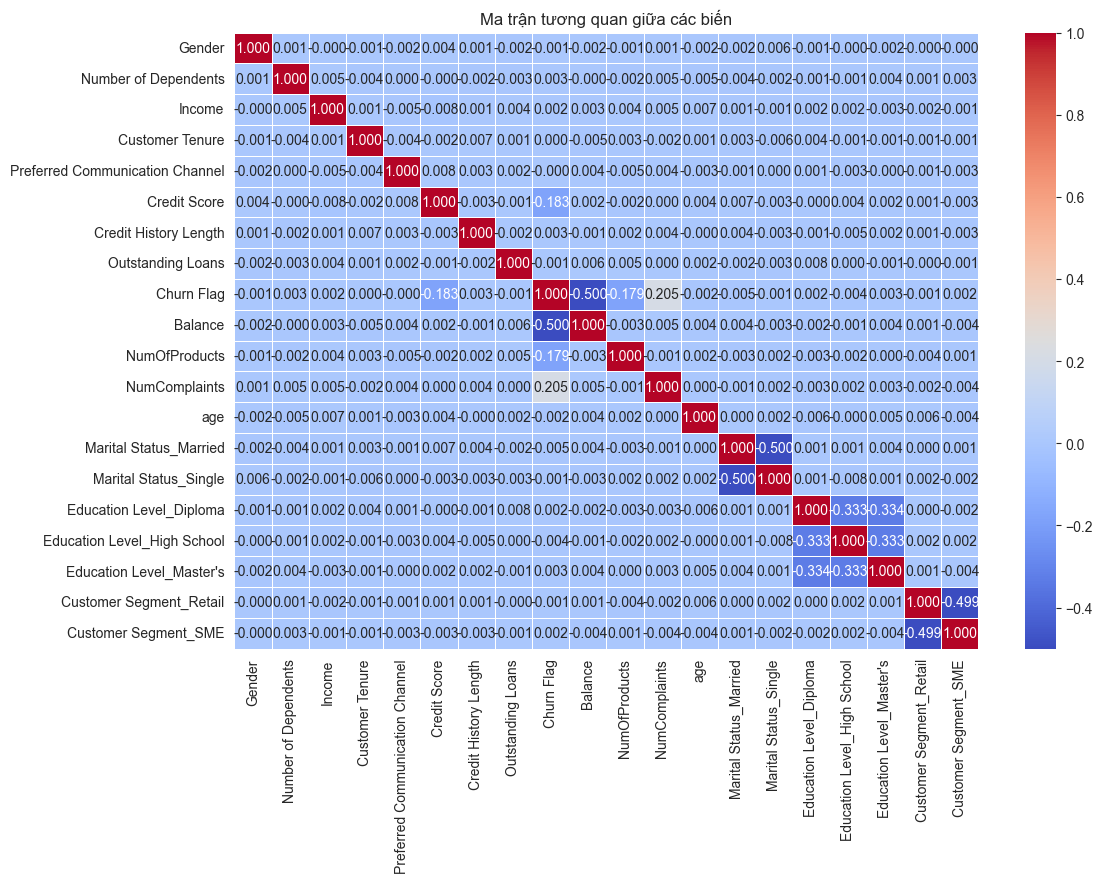

In [817]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán ma trận tương quan
correlation_matrix = filtered_data.corr()

# Tạo biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', linewidths=0.5)

# Thiết lập tiêu đề cho biểu đồ
plt.title('Ma trận tương quan giữa các biến')
plt.show()

In [818]:
print(filtered_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Gender                           115640 non-null  int64  
 1   Number of Dependents             115640 non-null  int64  
 2   Income                           115640 non-null  float64
 3   Customer Tenure                  115640 non-null  int64  
 4   Preferred Communication Channel  115640 non-null  int64  
 5   Credit Score                     115640 non-null  int64  
 6   Credit History Length            115640 non-null  int64  
 7   Outstanding Loans                115640 non-null  float64
 8   Churn Flag                       115640 non-null  int64  
 9   Balance                          115640 non-null  float64
 10  NumOfProducts                    115640 non-null  int64  
 11  NumComplaints                    115640 non-null  int64  
 12  ag

In [819]:
# correlation_matrix = filtered_data.corr()
# 
# # Tạo một bản sao của ma trận tương quan và đặt các giá trị đường chéo thành NaN
# correlation_matrix_no_diag = correlation_matrix.copy()
# np.fill_diagonal(correlation_matrix_no_diag.values, np.nan)
# 
# # Ngưỡng tương quan
# threshold = 0.18
# # Lấy nửa dưới của ma trận tương quan bằng cách sử dụng chỉ số
# lower_triangle = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))
# # Chuyển ma trận tương quan thành dạng DataFrame và lọc các giá trị lớn hơn ngưỡng
# high_corr_pairs = lower_triangle.stack().reset_index()
# high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
# high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'].abs() > threshold)]
# 
# print("Các cặp biến có tương quan cao (nửa dưới đường chéo):")
# print(high_corr_pairs)
# 


In [820]:
# # Lấy danh sách các cột từ các cặp tương quan cao
# columns_with_high_corr = set(high_corr_pairs['Variable 1']).union(set(high_corr_pairs['Variable 2']))
# 
# # Lọc dữ liệu chỉ giữ các cột có tương quan cao
# filtered_test_data = filtered_data[list(columns_with_high_corr)]
# 
# # Kiểm tra kết quả
# print(filtered_test_data.head())


In [821]:
import pandas as pd
import numpy as np

# Tính ma trận tương quan
correlation_matrix = filtered_data.corr()

# Đặt ngưỡng cho hệ số tương quan cao
threshold = 0.5

# Tìm các cặp biến có tương quan cao
high_corr = np.where((correlation_matrix.abs() > threshold) & (correlation_matrix < 1))
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                   for x, y in zip(*high_corr) if x < y]

print("Các cặp biến có tương quan cao:")
print(high_corr_pairs)

# Loại bỏ một số biến dư thừa (thủ công hoặc tự động)
# Ví dụ: Loại bỏ các biến có nhiều mối tương quan cao
columns_to_drop = set()
for pair in high_corr_pairs:
    # Thêm logic để giữ một biến và bỏ biến còn lại, ví dụ chọn biến theo thứ tự
    columns_to_drop.add(pair[1])  # Giữ lại biến đầu tiên, bỏ biến thứ hai

# Loại bỏ các cột được chọn
filtered_test_data = filtered_data.drop(columns=list(columns_to_drop))

print(f"Các cột bị loại bỏ: {columns_to_drop}")
print(f"Kích thước dữ liệu sau khi loại bỏ: {filtered_test_data.shape}")

Các cặp biến có tương quan cao:
[('Marital Status_Married', 'Marital Status_Single')]
Các cột bị loại bỏ: {'Marital Status_Single'}
Kích thước dữ liệu sau khi loại bỏ: (115640, 19)


In [822]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred, weights, alpha, reg_type="l2", class_weights=None):
    m = y.shape[0]
    
    # Nếu không có trọng số lớp, dùng mặc định (1 cho cả nhãn 0 và 1)
    if class_weights is None:
        class_weights = {0: 1, 1: 1}
    
    # Mất mát với trọng số lớp
    loss_0 = -np.sum((y == 0) * np.log(1 - y_pred)) * class_weights[0]  # Trọng số cho nhãn 0
    loss_1 = -np.sum((y == 1) * np.log(y_pred)) * class_weights[1]  # Trọng số cho nhãn 1
    base_loss = (loss_0 + loss_1) / m
    
    # Thêm phần hiệu chỉnh
    if reg_type == "l2":
        reg_term = alpha * np.sum(weights ** 2) / (2 * m)  # L2 Regularization
    elif reg_type == "l1":
        reg_term = alpha * np.sum(np.abs(weights)) / m  # L1 Regularization
    else:
        reg_term = 0

    return base_loss + reg_term

# Huấn luyện Logistic Regression với hiệu chỉnh
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, num_iterations=1000, alpha=0.01, reg_type="l2"):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.alpha = alpha  # Hệ số hiệu chỉnh
        self.reg_type = reg_type  # Loại hiệu chỉnh ("l1" hoặc "l2")
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0

        m = X.shape[0]

        for i in range(self.num_iterations):
            # Tính giá trị dự đoán
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)

            # Tính độ lỗi với hiệu chỉnh
            # loss = compute_loss(y, y_pred, self.weights, self.alpha, self.reg_type)
            # Trọng số cho nhãn 1 là 0.9 và nhãn 0 là 0.1
            class_weights = {0: 0.1, 1: 0.9}
            
            # Giả sử bạn đã có y (dữ liệu thật) và y_pred (dự đoán từ mô hình)
            loss = compute_loss(y, y_pred, self.weights, self.alpha, self.reg_type, class_weights=class_weights)
            # Gradient tính toán
            dw = (np.dot(X.T, (y_pred - y)) / m)  # Gradient của loss
            db = np.sum(y_pred - y) / m

            # Thêm hiệu chỉnh vào gradient
            if self.reg_type == "l2":
                dw += (self.alpha * self.weights) / m  # L2
            elif self.reg_type == "l1":
                dw += (self.alpha * np.sign(self.weights)) / m  # L1

            # Cập nhật trọng số và bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss:.4f}")


    def predict(self, X):
        # Tính giá trị dự đoán
        linear_model = np.dot(X, self.weights) + self.bias  
        y_pred = sigmoid(linear_model)
        # Phân loại dựa trên ngưỡng 0.5
        return [1 if i > 0.5 else 0 for i in y_pred]

def standardize_data(X):
    # Chỉ chọn các cột kiểu số
    X_numeric = X.select_dtypes(include=[np.number])
    # Chuẩn hóa
    return (X_numeric - np.mean(X_numeric, axis=0)) / np.std(X_numeric, axis=0)

# Chuẩn bị dữ liệu
X = filtered_test_data.drop(['Churn Flag'], axis=1)
y = filtered_test_data['Churn Flag']


# Chia dữ liệu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Sử dụng SMOTE để xử lý imbalance trên tập huấn luyện
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train_smote)
scaled_X_test = sc.transform(X_test)

Iteration 0, Loss: 0.3466
Iteration 100, Loss: 0.0572
Iteration 200, Loss: 0.0448
Iteration 300, Loss: 0.0391
Iteration 400, Loss: 0.0356
Iteration 500, Loss: 0.0330
Iteration 600, Loss: 0.0311
Iteration 700, Loss: 0.0295
Iteration 800, Loss: 0.0282
Iteration 900, Loss: 0.0271
Iteration 1000, Loss: 0.0262
Iteration 1100, Loss: 0.0253
Iteration 1200, Loss: 0.0246
Iteration 1300, Loss: 0.0239
Iteration 1400, Loss: 0.0233
Iteration 1500, Loss: 0.0228
Iteration 1600, Loss: 0.0223
Iteration 1700, Loss: 0.0219
Iteration 1800, Loss: 0.0214
Iteration 1900, Loss: 0.0210
Iteration 2000, Loss: 0.0207
Iteration 2100, Loss: 0.0203
Iteration 2200, Loss: 0.0200
Iteration 2300, Loss: 0.0197
Iteration 2400, Loss: 0.0194
Iteration 2500, Loss: 0.0192
Iteration 2600, Loss: 0.0189
Iteration 2700, Loss: 0.0187
Iteration 2800, Loss: 0.0184
Iteration 2900, Loss: 0.0182
Iteration 3000, Loss: 0.0180
Iteration 3100, Loss: 0.0178
Iteration 3200, Loss: 0.0176
Iteration 3300, Loss: 0.0174
Iteration 3400, Loss: 0.01

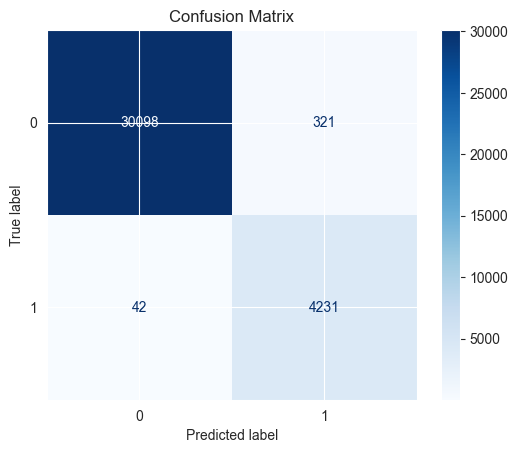

In [823]:


# Khởi tạo và huấn luyện mô hình
model = LogisticRegressionCustom(learning_rate=0.3, num_iterations=20000, alpha = 0.1, reg_type = "l2")
model.fit(scaled_X_train, y_train_smote)
# Dự đoán trên tập kiểm tra
y_pred = model.predict(scaled_X_test)
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# In ra classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Tính và in ra ROC-AUC
auc_score = roc_auc_score(y_test, y_pred)
print(f"Custom Logistic Regression - ROC-AUC: {auc_score:.4f}")

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')  # 'd' để hiển thị dưới dạng số nguyên

# Nếu muốn, bạn có thể thêm một số tùy chỉnh như tiêu đề
import matplotlib.pyplot as plt
plt.title("Confusion Matrix")
plt.show()




{'C': 10}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30419
           1       0.98      1.00      0.99      4273

    accuracy                           1.00     34692
   macro avg       0.99      1.00      0.99     34692
weighted avg       1.00      1.00      1.00     34692

Custom Logistic Regression - ROC-AUC: 0.9971


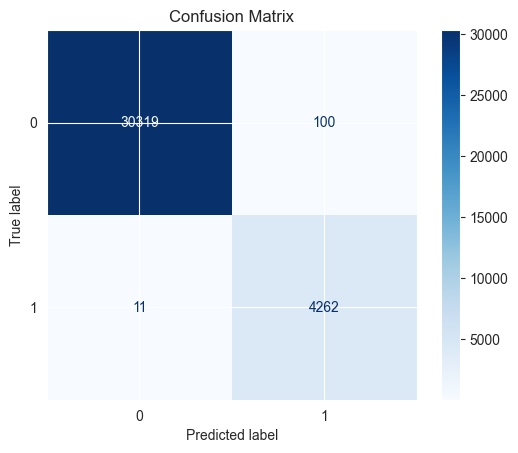

Confusion Matrix:
[[30319   100]
 [   11  4262]]


In [824]:
from sklearn.linear_model import LogisticRegression

# GridSearch với LogisticRegression từ sklearn
param_grid = {'C': [0.01, 0.1, 0.001, 10,100,10000]}  # C là nghịch đảo của alpha
grid = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid, cv=5, scoring='roc_auc')
grid.fit(scaled_X_train, y_train_smote)
print(grid.best_params_)
# # Dự đoán
# y_pred = model.predict(X_test)
y_pred = grid.predict(scaled_X_test)
# Đánh giá mô hình
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

print("Classification Report:")
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_pred)
print(f"Custom Logistic Regression - ROC-AUC: {auc_score:.4f}")
# Tính ma trận nhầm lẫn
# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')  # 'd' để hiển thị dưới dạng số nguyên

# Nếu muốn, bạn có thể thêm một số tùy chỉnh như tiêu đề
import matplotlib.pyplot as plt
plt.title("Confusion Matrix")
plt.show()

# In ma trận nhầm lẫn dưới dạng số
print("Confusion Matrix:")
print(cm)
